**Data Analyst Jobs**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv("/content/drive/MyDrive/python project new/ job growth analysis over years using pyspark/DataAnalyst.csv")
df

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,-1
2249,2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",-1
2250,2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",-1.0,Spiceorb,"Denver, CO",-1,-1,-1,-1,-1,-1,-1,-1,-1
2251,2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),-1,-1


In [3]:
!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=fb7d9282429dcc98d61b23973aac435bca9bba2a5305c9294ede8533fcbb4a67
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [ ]:
#Data Cleaning and Preprocessing

In [12]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, year, month, count, avg
from pyspark.sql.types import IntegerType
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Spark session
spark = SparkSession.builder.appName("JobGrowthAnalysis").getOrCreate()


In [13]:
# Load the dataset
df_spark = spark.read.csv("/content/drive/MyDrive/python project new/ job growth analysis over years using pyspark/DataAnalyst.csv", header=True, inferSchema=True)

# Show the schema to verify data types
df_spark.printSchema()

# Display the first few rows
df_spark.show(5)


root
 |-- _c0: string (nullable = true)
 |-- Job Title: string (nullable = true)
 |-- Salary Estimate: string (nullable = true)
 |-- Job Description: string (nullable = true)
 |-- Rating: string (nullable = true)
 |-- Company Name: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Headquarters: string (nullable = true)
 |-- Size: string (nullable = true)
 |-- Founded: string (nullable = true)
 |-- Type of ownership: string (nullable = true)
 |-- Industry: string (nullable = true)
 |-- Sector: string (nullable = true)
 |-- Revenue: string (nullable = true)
 |-- Competitors: string (nullable = true)
 |-- Easy Apply: string (nullable = true)

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------+----+-------+-----------------+--------+------+-------+-----------+----------+
|                 _c0|           Job Title|     Salary Estimate|     Job Description|       

In [15]:
# Show the column names in the DataFrame
df_spark.columns


['_c0',
 'Job Title',
 'Salary Estimate',
 'Job Description',
 'Rating',
 'Company Name',
 'Location',
 'Headquarters',
 'Size',
 'Founded',
 'Type of ownership',
 'Industry',
 'Sector',
 'Revenue',
 'Competitors',
 'Easy Apply']

In [16]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count
from pyspark.sql.types import IntegerType
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Spark session
spark = SparkSession.builder.appName("JobGrowthAnalysis").getOrCreate()

# Load the dataset
df_spark = spark.read.csv("/content/drive/MyDrive/python project new/ job growth analysis over years using pyspark/DataAnalyst.csv", header=True, inferSchema=True)

# Show the schema to verify data types
df_spark.printSchema()


root
 |-- _c0: string (nullable = true)
 |-- Job Title: string (nullable = true)
 |-- Salary Estimate: string (nullable = true)
 |-- Job Description: string (nullable = true)
 |-- Rating: string (nullable = true)
 |-- Company Name: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Headquarters: string (nullable = true)
 |-- Size: string (nullable = true)
 |-- Founded: string (nullable = true)
 |-- Type of ownership: string (nullable = true)
 |-- Industry: string (nullable = true)
 |-- Sector: string (nullable = true)
 |-- Revenue: string (nullable = true)
 |-- Competitors: string (nullable = true)
 |-- Easy Apply: string (nullable = true)



In [17]:
# Convert the 'Founded' column to integer
df_spark = df_spark.withColumn("Founded", df_spark["Founded"].cast(IntegerType()))

# Filter out rows where 'Founded' is null or not a valid year (e.g., negative or zero values)
df_spark = df_spark.filter(df_spark["Founded"].isNotNull() & (df_spark["Founded"] > 0))

# Rename 'Founded' to 'Year' for clarity
df_spark = df_spark.withColumnRenamed("Founded", "Year")


In [18]:
# Group by year and count the number of job entries
job_growth = df_spark.groupBy("Year").agg(count("Job Title").alias("Job_Count"))

# Show the resulting DataFrame
job_growth.show()


+----+---------+
|Year|Job_Count|
+----+---------+
|   3|       16|
|   4|        6|
|   2|        1|
+----+---------+



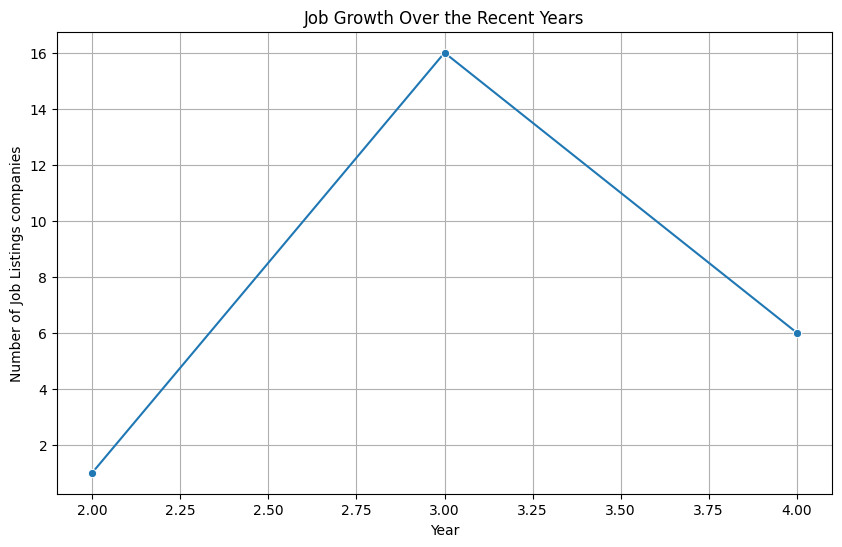

In [20]:
# Convert to Pandas DataFrame for visualization
job_growth_pd = job_growth.toPandas()

# Sort by year for better visualization
job_growth_pd = job_growth_pd.sort_values(by="Year")

# Plot the job growth trend over the years
plt.figure(figsize=(10,6))
sns.lineplot(x="Year", y="Job_Count", data=job_growth_pd, marker='o')
plt.title("Job Growth Over the Recent Years")
plt.xlabel("Year")
plt.ylabel("Number of Job Listings companies")
plt.grid(True)
plt.show()
